### STUDENT PERFORMANCE INDICATOR

1. PROBLEM STATEMENT
- This project understands how the student's performance (test scores) is affected by other variables such as Gender,Ethnicity,Parental level of education, Lunch and Test perparation course

2. DATA COLLECTION
- Data source https://www.kaggle.com/datasets/spscientist/students-performance-in-exams 

Import Data and Require Packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Import the `csv` data

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
# shape  of dataset
df.shape

(1000, 8)

Dataset Information

- gender 
- rate/ethnicity: ethnicity of students -> (grp A,B,C,D,E) 
- parental level of education: parent's final education
- lunch: having lunch before test
- test preparation course: complete or not complete before test
- math score
- reading score
- writing score 

Data Checks to perform

- check Missing values
- check Duplicates
- check data type
- check the number of unique values of each col
- check statistics of dataset
- check various categories present in the different  categorical col

In [6]:
# missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# duplicate values
df.duplicated().sum()

0

In [8]:
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# unique values

print(df["gender"].unique())
print(df["race/ethnicity"].unique()),
print(df["parental level of education"].unique())
print(df["lunch"].unique())
print(df["test preparation course"].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
# 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
# categorical col
categorical_features = [features for features in df.columns  if df[features].dtype == "O"]
#numerical col
numerical_features =[features for features in df.columns if df[features].dtype !="O"]

print("Categorical features ",len(categorical_features)," ",categorical_features)

print("Numerical features ",len(numerical_features)," ",numerical_features)

Categorical features  5   ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical features  3   ['math score', 'reading score', 'writing score']


In [13]:
# Adding col for "Total Score" and "Average"
df["total score"] = df["math score"] + df["reading score"]+ df["writing score"]
df["average"] = df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full= df[df["reading score"] ==100]["average"].count()
writing_full = df[df["writing score"] ==100]["average"].count()
math_full = df[df["math score"] ==100]["average"].count()


print("Number of student with full marks in writing ",writing_full)
print("Number of student with full marks in maths ",math_full)
print("Number of student with full marks in reading ",reading_full)

Number of student with full marks in writing  14
Number of student with full marks in maths  7
Number of student with full marks in reading  17


In [15]:
reading_less_20= df[df["reading score"] <=20]["average"].count()
writing_less_20 = df[df["writing score"] <=20]["average"].count()
math_less_20 = df[df["math score"] <=20]["average"].count()

print("Number of student with less than 20 marks in writing ",writing_less_20)
print("Number of student with less than 20 marks in maths ",math_less_20)
print("Number of student with less than 20 marks in reading ",reading_less_20)

Number of student with less than 20 marks in writing  3
Number of student with less than 20 marks in maths  4
Number of student with less than 20 marks in reading  1


Exploring Data

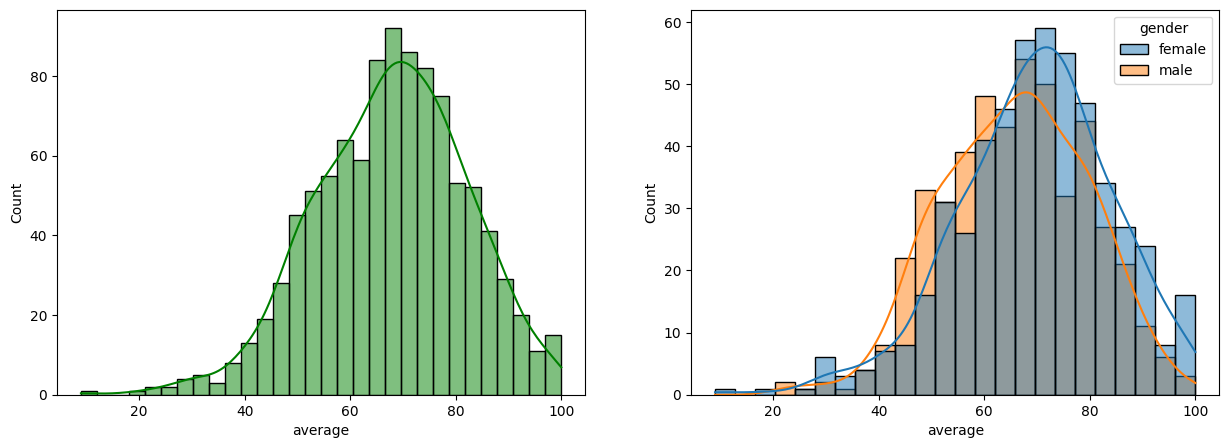

In [16]:
# average score
fig,axs = plt.subplots(1,2,figsize=(15,5)) 
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="average",kde=True,hue="gender")
plt.show();

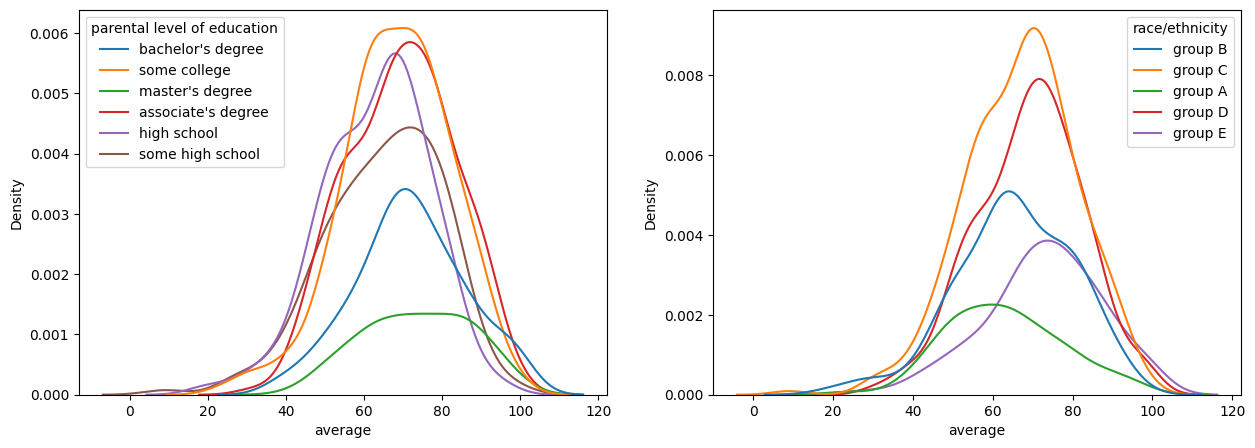

In [17]:
fig,axs =  plt.subplots(1,2,figsize = (15,5))
plt.subplot(121)
sns.kdeplot(data=df,x=df["average"],hue=df["parental level of education"])
plt.subplot(122)
sns.kdeplot(data=df,x=df["average"],hue=df["race/ethnicity"])
plt.show();

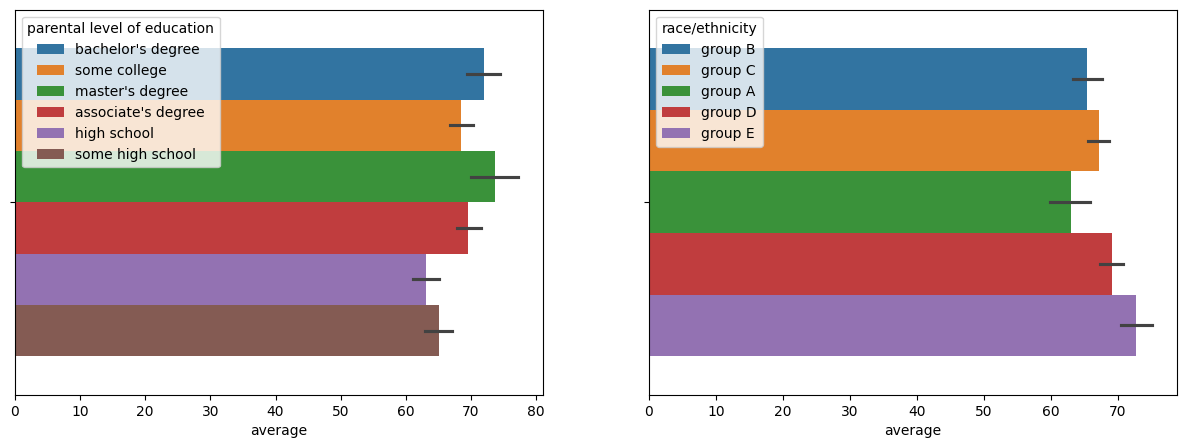

In [18]:
fig,axs =  plt.subplots(1,2,figsize = (15,5))
plt.subplot(121)
sns.barplot(data=df,x=df["average"],hue=df["parental level of education"])
plt.subplot(122)
sns.barplot(data=df,x=df["average"],hue=df["race/ethnicity"])
plt.show();

In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


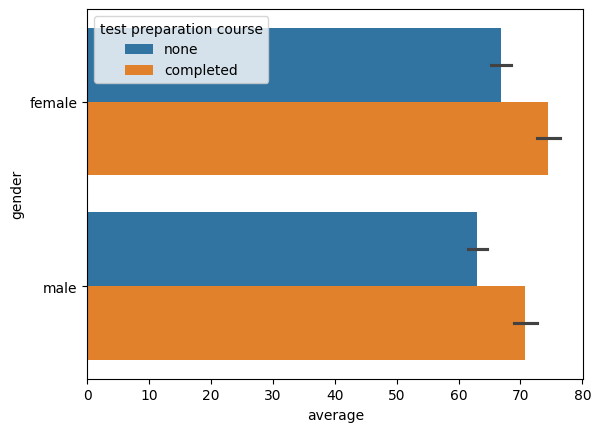

In [27]:

sns.barplot(data=df,x=df["average"],hue=df["test preparation course"],y=df["gender"]);

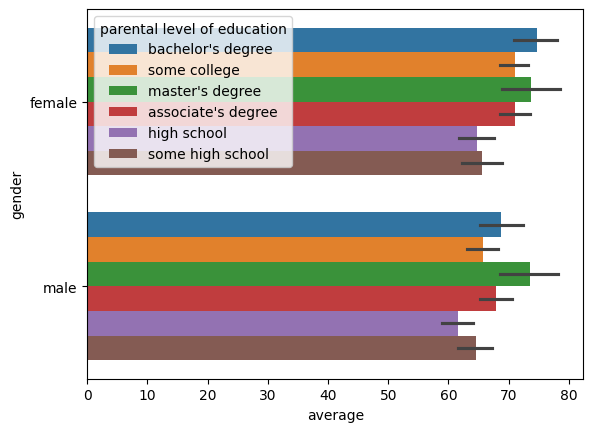

In [28]:
sns.barplot(data=df,x=df["average"],hue=df["parental level of education"],y=df["gender"]);

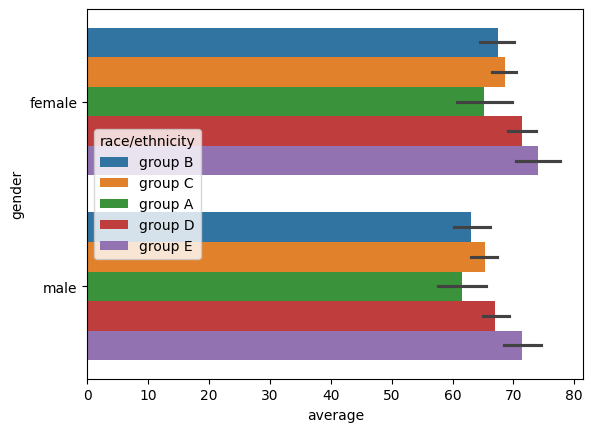

In [29]:
sns.barplot(data=df,x=df["average"],hue=df["race/ethnicity"],y=df["gender"]);

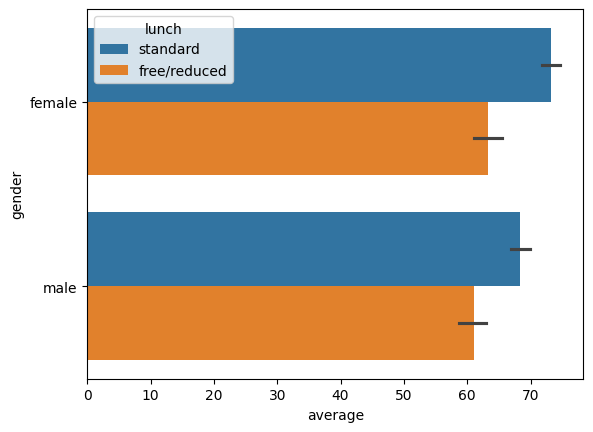

In [30]:
sns.barplot(data=df,x=df["average"],hue=df["lunch"],y=df["gender"]);

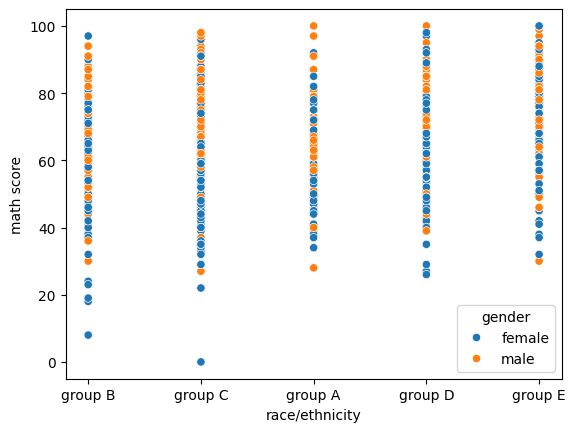

In [39]:
sns.scatterplot(data=df,x=df["race/ethnicity"],y=df["math score"],hue=df["gender"]);

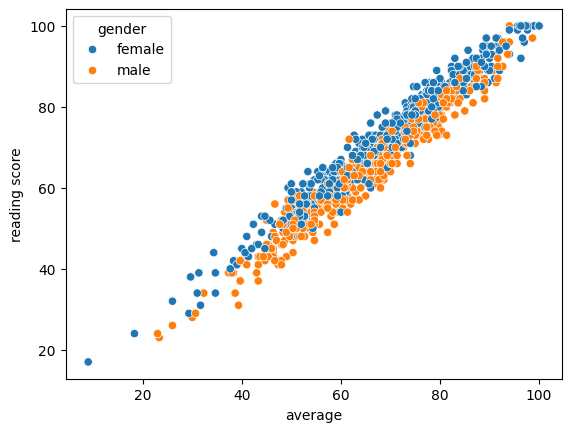

In [36]:
sns.scatterplot(data=df,x=df["average"],y=df["reading score"],hue=df["gender"]);